In [2]:
import os
from os.path import abspath

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#loading all the data

#patient demographic
demo = pd.read_csv(abspath("../dataScienceTask/T_demo.csv"))
#medications
meds = pd.read_csv(abspath("../dataScienceTask/T_meds.csv"))
#CDK stage progress
stage = pd.read_csv(abspath("../dataScienceTask/T_stage.csv"))

#CDK clinical markers
creatinine = pd.read_csv(abspath("../dataScienceTask/T_creatinine.csv"))
DBP = pd.read_csv(abspath("../dataScienceTask/T_DBP.csv"))
SBP = pd.read_csv(abspath("../dataScienceTask/T_SBP.csv"))
HGB = pd.read_csv(abspath("../dataScienceTask/T_HGB.csv"))
glucose = pd.read_csv(abspath("../dataScienceTask/T_glucose.csv"))
ldl = pd.read_csv(abspath("../dataScienceTask/T_ldl.csv"))

Race:
 White       226
Unknown      26
Black        24
Asian        17
Hispanic      7
Name: race, dtype: int64
White       0.753333
Unknown     0.086667
Black       0.080000
Asian       0.056667
Hispanic    0.023333
Name: race, dtype: float64
Gender:
 Female    176
Male      124
Name: gender, dtype: int64
Female    0.586667
Male      0.413333
Name: gender, dtype: float64
Age:
 count    300.000000
mean      70.383333
std        9.247058
min       46.000000
25%       64.000000
50%       71.000000
75%       78.000000
max       86.000000
Name: age, dtype: float64


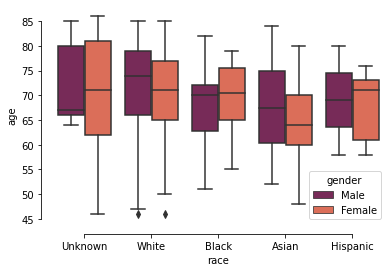

In [4]:
#Exploring patient demographic

#race
race = demo.race.value_counts()
print("Race:\n",race)
race_percent = race/race.sum()
print(race_percent)

#gender 
gender = demo.gender.value_counts()
print("Gender:\n", gender)
gender_percent = gender/gender.sum()
print(gender_percent)

#age
age = demo.age.describe()
print("Age:\n",age)

#plot demographic 

sns.boxplot(x="race", y="age",
            hue="gender", palette="rocket",
            data=demo)

sns.despine(offset=10, trim=True)


In [5]:
# Exploring CKD stage progress

stage_progress = stage.Stage_Progress.value_counts()
print("Stage Progress Information:\n", stage_progress)

stage_progress_percent = stage_progress/stage_progress.sum()
print("Percentage of Progression:\n", stage_progress_percent)


Stage Progress Information:
 False    200
True     100
Name: Stage_Progress, dtype: int64
Percentage of Progression:
 False    0.666667
True     0.333333
Name: Stage_Progress, dtype: float64


Asian
False    12
True      5
Name: Stage_Progress, dtype: int64
False    0.705882
True     0.294118
Name: Stage_Progress, dtype: float64


Black
False    18
True      6
Name: Stage_Progress, dtype: int64
False    0.75
True     0.25
Name: Stage_Progress, dtype: float64


Hispanic
False    4
True     3
Name: Stage_Progress, dtype: int64
False    0.571429
True     0.428571
Name: Stage_Progress, dtype: float64


Unknown
False    16
True     10
Name: Stage_Progress, dtype: int64
False    0.615385
True     0.384615
Name: Stage_Progress, dtype: float64


White
False    150
True      76
Name: Stage_Progress, dtype: int64
False    0.663717
True     0.336283
Name: Stage_Progress, dtype: float64




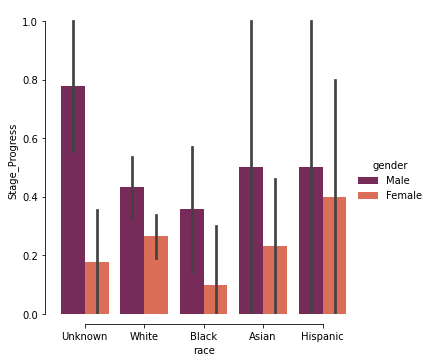

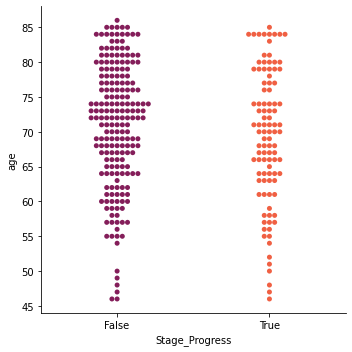

In [6]:
# Stage progress data merged with demographic data to see the distribution by race, gender and age

demo_stage = pd.concat([demo,stage],axis=1) #concat by column

#Stage progress by RACE

for r, val in demo_stage.groupby("race"):
    print(r)
    print(val.Stage_Progress.value_counts())
    print(val.Stage_Progress.value_counts()/val.Stage_Progress.value_counts().sum())
    print("\n")
    
#plot for RACE and GENDER
sns.catplot(x="race", y="Stage_Progress", hue="gender", palette ="rocket", kind="bar", data=demo_stage)
sns.despine(offset=10, trim=True)

#plot for AGE
sns.catplot(x ="Stage_Progress", y ="age", palette ="rocket", kind="swarm", data=demo_stage)

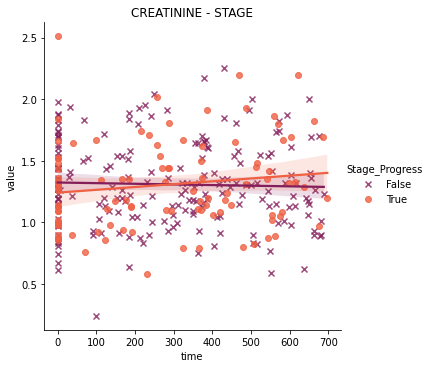

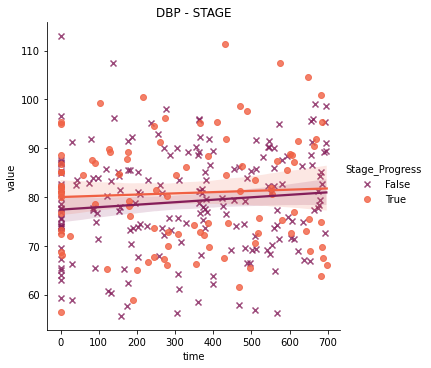

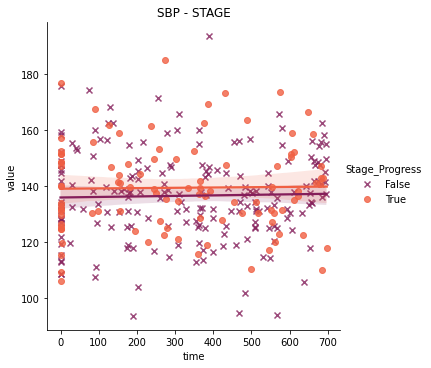

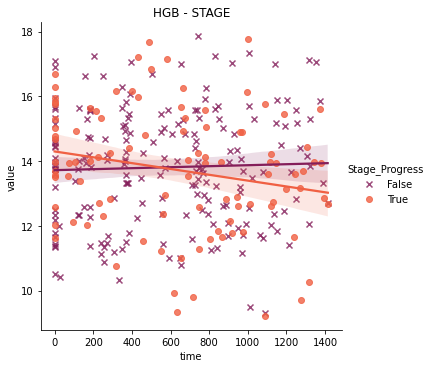

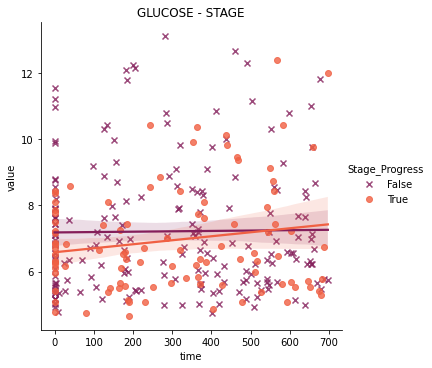

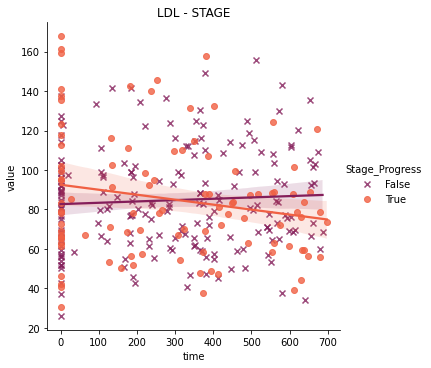

In [7]:
#Exploring clinical markers for CKD using results of linear regression for each dataset

# creatinine
cr_stage = pd.concat([creatinine,stage],axis=1)
sns.lmplot(x="time", y="value", hue="Stage_Progress", palette="rocket", 
           data=cr_stage,  markers=["x", "o"]).set(title="CREATININE - STAGE")

# DBP - diastolic blood pressure
dbp_stage = pd.concat([DBP,stage],axis=1)
sns.lmplot(x="time", y="value", hue="Stage_Progress", palette="rocket", 
           data=dbp_stage,  markers=["x", "o"]).set(title="DBP - STAGE")

# SBP - systolic blood pressure
sbp_stage = pd.concat([SBP,stage],axis=1)
sns.lmplot(x="time", y="value", hue="Stage_Progress", palette="rocket", 
           data=sbp_stage,  markers=["x", "o"]).set(title="SBP - STAGE")

# HGB - hemoglobin
hgb_stage = pd.concat([HGB,stage],axis=1)
sns.lmplot(x="time", y="value", hue="Stage_Progress", palette="rocket", 
           data=hgb_stage,  markers=["x", "o"]).set(title="HGB - STAGE")

# glucose
glucose_stage = pd.concat([glucose,stage],axis=1)
sns.lmplot(x="time", y="value", hue="Stage_Progress", palette="rocket", 
           data=glucose_stage,  markers=["x", "o"]).set(title="GLUCOSE - STAGE")

# ldl - low-density lipoprotein
ldl_stage = pd.concat([ldl,stage],axis=1)
sns.lmplot(x="time", y="value", hue="Stage_Progress", palette="rocket", 
           data=ldl_stage,  markers=["x", "o"]).set(title="LDL - STAGE")


Patients taking medicine = 272
labetalol          1
propranolol        2
dapagliflozin      2
pitavastatin       2
nebivolol          2
canagliflozin      4
telmisartan        4
bisoprolol         5
irbesartan         6
olmesartan         7
lovastatin        16
carvedilol        17
atenolol          26
valsartan         27
pravastatin       28
rosuvastatin      31
metoprolol        60
losartan          71
simvastatin       75
atorvastatin     109
metformin        116
dtype: int64


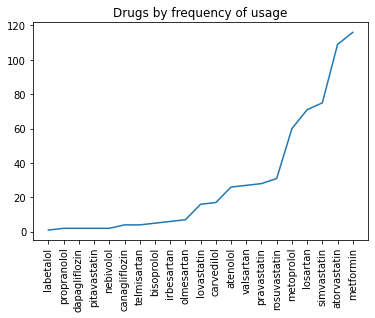

In [8]:
# Exploring Medication data

# Patients taking medication
print("Patients taking medicine =", meds.id.unique().shape[0])


#which drugs are taken by which patient id
drug_order = pd.Series({idx:drug.id.unique().shape[0] for idx, drug in meds.groupby("drug")}) 
#sort by count 
sort_drug = drug_order.sort_values()

print(sort_drug)

plt.xticks(rotation='vertical')
plt.title("Drugs by frequency of usage")
plt.plot(sort_drug)

<AxesSubplot:xlabel='drug', ylabel='daily_dosage'>

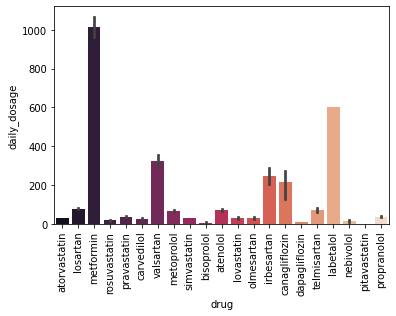

In [112]:
# Dosage per drug
plt.xticks(rotation='vertical')
sns.barplot(x="drug", y="daily_dosage", palette="rocket", data=meds)


<AxesSubplot:xlabel='drug', ylabel='time'>

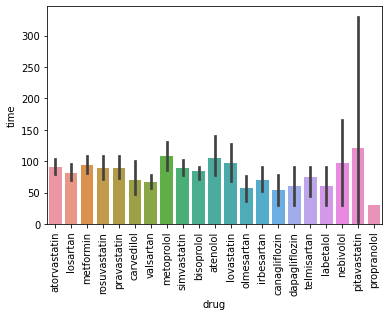

In [116]:
# Time frame of drug use end-start
meds["time"] = meds["end_day"]-meds["start_day"]
plt.xticks(rotation='vertical')
sns.barplot(x="drug", y="time", data=meds[["id", "drug", "time"]].drop_duplicates())